In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
with open('./temp2.txt', 'r') as fout:
    value = fout.read()

In [42]:
#a = pd.DataFrame([i.split(',')for i in value.split('/n')][:-1], columns=['t','K','P','Tot'])
a = pd.DataFrame([i.split(',') for i in value.split('\n')][:-1], columns=['t','K','P','Tot'])

a.t = a.t.astype('int')
a.K = a.K.astype('float')
a.P = a.P.astype('float')
a.Tot = a.Tot.astype('float')

Text(0.5, 1.0, 'Energia en función del paso temporal')

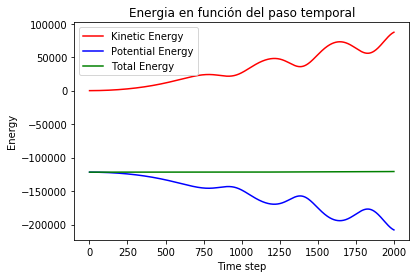

In [45]:
plt.plot(a.t,a.K, c='r',label='Kinetic Energy')
plt.plot(a.t,a.P, c='b',label='Potential Energy')
plt.plot(a.t,a.Tot, c='g', label='Total Energy')
plt.legend()
plt.xlabel('Time step')
plt.ylabel('Energy')
plt.title('Energia en función del paso temporal')

4.623500000000007

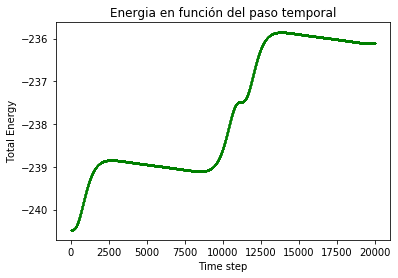

In [22]:
plt.scatter(a.t,a.Tot, s=.1, c='g')
plt.xlabel('Time step')
plt.ylabel('Total Energy')
plt.title('Energia en función del paso temporal')
a.Tot.max()-a.Tot.min()

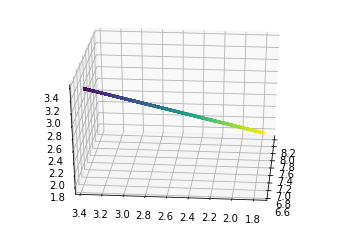

In [6]:
with open('./pos.txt', 'r') as fout:
    value2 = fout.read()
b = pd.DataFrame([i.split(',') for i in value2.split('\n')][1:-1], columns=['t','Rx1','Ry1','Rz1'])

b.t = b.t.astype('int')
b.Rx1 = b.Rx1.astype('float')
b.Ry1 = b.Ry1.astype('float')
b.Rz1 = b.Rz1.astype('float')


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(b['Rx1'], b['Ry1'], b['Rz1'], c=b['t'], s=3)
ax.view_init(30, 185)
plt.show()
